# DeepMILO Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from tqdm import tqdm

In [3]:
import h5py

In [4]:
DATASET_ROOT = Path("D:\Datasets\Chromatin Loops")

In [5]:
DEEPMILO_DATA = DATASET_ROOT / "deepmilo_data"

In [29]:
[x for x in DEEPMILO_DATA.iterdir() if 'boundary' in str(x) and 'direction' not in str(x) and 'leftout' not in str(x) and 'data_' in str(x)]

[WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_testtest141_ruan.mat'),
 WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_testtest141_type1_ruan.mat'),
 WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_testtest141_type2_ruan.mat'),
 WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_testtest141_type3_ruan.mat'),
 WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_traintest141_ruan.mat'),
 WindowsPath('D:/Datasets/Chromatin Loops/deepmilo_data/data_boundary_4k_valtest141_ruan.mat')]

In [6]:
boundary_master_file = DEEPMILO_DATA / "data_boundary_4k_train_ruan.mat"

In [7]:
boundary_master = h5py.File(boundary_master_file, 'w')

In [8]:
boundary_gm12878_file = DEEPMILO_DATA / "data_boundary_4k_train_leftout_gm12878.mat"
boundary_gm12878 = h5py.File(boundary_gm12878_file, 'r')

In [9]:
boundary_k562_file = DEEPMILO_DATA / "data_boundary_4k_train_leftout_k562.mat"
boundary_k562 = h5py.File(boundary_k562_file, 'r')

In [10]:
boundary_mcf7_file = DEEPMILO_DATA / "data_boundary_4k_train_leftout_mcf7.mat"
boundary_mcf7 = h5py.File(boundary_mcf7_file, 'r')

In [11]:
for k, v in boundary_gm12878.items():
    h5py.h5o.copy(boundary_gm12878.id, bytes(k,encoding="utf-8"), boundary_master.id, bytes(f"gm12878_{k}",encoding="utf-8"))

In [12]:
for k, v in boundary_k562.items():
    h5py.h5o.copy(boundary_k562.id, bytes(k,encoding="utf-8"), boundary_master.id, bytes(f"k562_{k}",encoding="utf-8"))

In [13]:
for k, v in boundary_mcf7.items():
    h5py.h5o.copy(boundary_mcf7.id, bytes(k,encoding="utf-8"), boundary_master.id, bytes(f"mcf7_{k}",encoding="utf-8"))

In [15]:
len(boundary_master)

460594

In [17]:
boundary_gm12878.keys()

<KeysViewHDF5 ['chr10_100000786_100004920__1', 'chr10_100000786_100004920__2', 'chr10_100020481_100024492__1', 'chr10_100020481_100024492__2', 'chr10_100054539_100058539__1', 'chr10_100054539_100058539__2', 'chr10_100067003_100071562__1', 'chr10_100067003_100071562__2', 'chr10_100089399_100093399__1', 'chr10_100089399_100093399__2', 'chr10_100098931_100102931__1', 'chr10_100098931_100102931__2', 'chr10_100152495_100156495__1', 'chr10_100152495_100156495__2', 'chr10_100182678_100186678__1', 'chr10_100182678_100186678__2', 'chr10_100183885_100187885__1', 'chr10_100183885_100187885__2', 'chr10_100222277_100226277__1', 'chr10_100222277_100226277__2', 'chr10_100225439_100229740__1', 'chr10_100225439_100229740__2', 'chr10_100245635_100249670__1', 'chr10_100245635_100249670__2', 'chr10_100291940_100295940__1', 'chr10_100291940_100295940__2', 'chr10_100397801_100401801__1', 'chr10_100397801_100401801__2', 'chr10_100422370_100426532__1', 'chr10_100422370_100426532__2', 'chr10_100504999_10050899

In [14]:
boundary_master.flush()
boundary_master.close()

In [6]:
boundary_master = h5py.File(boundary_master_file, 'r')

In [10]:
boundary_master_train = h5py.File(DEEPMILO_DATA / "data_boundary_4k_train.mat", 'w')
boundary_master_val = h5py.File(DEEPMILO_DATA / "data_boundary_4k_val.mat", 'w')
boundary_master_test = h5py.File(DEEPMILO_DATA / "data_boundary_4k_test.mat", 'w')

In [11]:
for k, v in tqdm(boundary_master.items()):
    if 'chr16' in k:
        h5py.h5o.copy(boundary_master.id, bytes(k,encoding="utf-8"), boundary_master_val.id, bytes(k,encoding="utf-8"))
    elif 'chr7' in k or 'chr8' in k:
        h5py.h5o.copy(boundary_master.id, bytes(k,encoding="utf-8"), boundary_master_test.id, bytes(k,encoding="utf-8"))
    else:
        h5py.h5o.copy(boundary_master.id, bytes(k,encoding="utf-8"), boundary_master_train.id, bytes(k,encoding="utf-8"))

100%|████████████████████████████████████████████████████████████████████████| 460594/460594 [02:09<00:00, 3546.45it/s]


In [12]:
print(f"Train: {len(boundary_master_train)}")
print(f"Val: {len(boundary_master_val)}")
print(f"Test: {len(boundary_master_test)}")

Train: 413144
Val: 0
Test: 47450


In [13]:
boundary_master_train.flush()
boundary_master_train.close()

boundary_master_val.flush()
boundary_master_val.close()

boundary_master_test.flush()
boundary_master_test.close()

In [30]:
boundary_master['gm12878_chr10_100000786_100004920__1'].name

'/gm12878_chr10_100000786_100004920__1'

In [20]:
dir(boundary_master['gm12878_chr10_100000786_100004920__1'])

['__array__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache_props',
 '_d',
 '_dcpl',
 '_dxpl',
 '_e',
 '_extent_type',
 '_fast_read_ok',
 '_fast_reader',
 '_filters',
 '_id',
 '_is_empty',
 '_lapl',
 '_lcpl',
 '_local',
 '_readonly',
 '_selector',
 'asstr',
 'astype',
 'attrs',
 'chunks',
 'compression',
 'compression_opts',
 'dims',
 'dtype',
 'external',
 'fields',
 'file',
 'fillvalue',
 'fletcher32',
 'flush',
 'id',
 'is_virtual',
 'iter_chunks',
 'len',
 'make_scale',
 'maxshape',
 'name',
 'nbytes',
 'ndim',
 'parent',
 'read_direct

In [ ]:
boundary_master.keys()

In [11]:
loop_file = DEEPMILO_DATA / "data_loop_4k_train_ruan-001.mat"

In [12]:
loops = h5py.File(loop_file, 'r')

In [15]:
loop_lengths = []
for k, v in tqdm(loops.items()):
    parts = k.split('_')    
    l = int(parts[4]) - int(parts[1])
    loop_lengths.append(l)

100%|████████████████████████████████████████████████████████████████████████| 321600/321600 [01:05<00:00, 4909.45it/s]


In [18]:
from matplotlib import pyplot as plt

In [22]:
np.median(loop_lengths)

195036.0

(array([3.21516e+05, 4.80000e+01, 8.00000e+00, 1.00000e+01, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([4.40100000e+03, 1.31587206e+07, 2.63130402e+07, 3.94673598e+07,
        5.26216794e+07, 6.57759990e+07, 7.89303186e+07, 9.20846382e+07,
        1.05238958e+08, 1.18393277e+08, 1.31547597e+08]),
 <BarContainer object of 10 artists>)

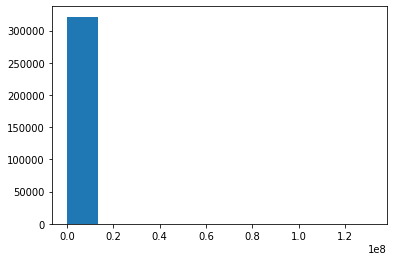

In [19]:
plt.hist(loop_lengths)

In [6]:
label_boundary_file = DEEPMILO_DATA / "label_boundary_4k_traintest141_ruan.mat"

In [7]:
label_boundary = h5py.File(label_boundary_file, 'r')

In [8]:
len(label_boundary)

150110

In [6]:
import random
import os

In [7]:
NUM_SPLITS = 8

In [11]:
def shard(root, src_dataset, keys, dataset_name, data_split, num_splits):
    dir_name = root / f"{dataset_name}_{data_split}"
    template = str(dir_name / "{}_{}test_{}.mat")
    
    if not os.path.exists(str(dir_name)):
        os.mkdir(dir_name)
    
    data_splits = [h5py.File(template.format(dataset_name, data_split, s), 'w') for s in range(num_splits)]
    
    for i, k in enumerate(tqdm(keys, desc=f"{dataset_name}_{data_split}")):
        split = i % num_splits
        idx = i // num_splits
        h5py.h5o.copy(src_dataset.id, bytes(k,encoding="utf-8"), data_splits[split].id, bytes(str(idx), encoding="utf-8"))
        
    for datafile in data_splits:
        datafile.flush()
        datafile.close()

In [12]:
def split_data(root, data_split, num_splits):
    data_boundary_file = root / f"data_boundary_4k_{data_split}test141_ruan.mat"
    data_boundary = h5py.File(data_boundary_file, 'r')
    
    data_label_file = root / f"label_boundary_4k_{data_split}test141_ruan.mat"
    data_label = h5py.File(data_label_file, 'r')
    
    data_keys = random.sample(list(data_boundary.keys()), len(data_boundary) - (len(data_boundary) % num_splits))
    
    shard(root, data_boundary, data_keys, "data_boundary", data_split, num_splits)
    shard(root, data_label, data_keys, "label_boundary", data_split, num_splits)

In [13]:
split_data(DEEPMILO_DATA, "train", NUM_SPLITS)
split_data(DEEPMILO_DATA, "val", NUM_SPLITS)
split_data(DEEPMILO_DATA, "test", NUM_SPLITS)

label_boundary_test: 100%|████████████████████████████████████████████████████| 23744/23744 [00:00<00:00, 25205.94it/s]


In [9]:
data_boundary_file = DEEPMILO_DATA / "data_boundary_train" / "data_boundary_traintest_0.mat"
data_boundary_shard = h5py.File(data_boundary_file, 'r')

In [8]:
data_boundary_shard.close()